In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

In [28]:
df1 = pd.read_csv("SalaryData_Train.csv")
df2 = pd.read_csv("SalaryData_Test.csv")

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [31]:
df = df1.append(df2,ignore_index=True)
print(df.shape)

(45221, 14)


In [32]:
col_name = ["Age","workclass","fnlwgt","education","edunum","marstatus","occupation","relationship","race","sex","gain","loss","hpweek","country","income"]

In [33]:
df.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [34]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
---- education ---
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
---- educationno ---
9     14783
10     9898
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      54

In [35]:
col_name = ["Age","workclass","education","edunum","marstatus","occupation","relationship","race","sex","gain","loss","hpweek","country","salary"]

In [36]:
df1 = pd.read_csv("SalaryData_Train.csv",names=col_name)
df2 = pd.read_csv("SalaryData_Test.csv",names=col_name)

In [37]:
df = df1.append(df2,ignore_index=True)
print(df.shape)

(45223, 14)


In [38]:
df.income.unique()

array(['Salary', ' <=50K', ' >50K'], dtype=object)

In [39]:
df['income'].replace(regex=True,inplace=True,to_replace=r' <=50K.',value=r'1')
df['income'].replace(regex=True,inplace=True,to_replace=r' <=50K',value=r'1')
df['income'].replace(regex=True,inplace=True,to_replace=r' >50K.',value=r'0')
df['income'].replace(regex=True,inplace=True,to_replace=r' >50K',value=r'0')

In [40]:
col_name = df.iloc[0]
df = df[1:]

In [41]:
df.head(20)

,Age,workclass,education,edunum,marstatus,occupation,relationship,race,sex,gain,loss,hpweek,country,income
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
7,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
9,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
10,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0


In [42]:
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Farming-fishing',value=r'1')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Tech-support',value=r'2')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Adm-clerical',value=r'3')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Handlers-cleaners',value=r'4')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Prof-specialty',value=r'5')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Machine-op-inspct',value=r'6')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Exec-managerial',value=r'7')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Priv-house-serv',value=r'8')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Craft-repair',value=r'9')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Sales',value=r'10')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Transport-moving',value=r'11')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Armed-Forces',value=r'12')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Other-service',value=r'13')
df['occupation'].replace(regex=True,inplace=True,to_replace=r' Protective-serv',value=r'14')


In [43]:
df.head()

,Age,workclass,education,edunum,marstatus,occupation,relationship,race,sex,gain,loss,hpweek,country,income
1,39,State-gov,Bachelors,13,Never-married,3,Not-in-family,White,Male,2174,0,40,United-States,1
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,7,Husband,White,Male,0,0,13,United-States,1
3,38,Private,HS-grad,9,Divorced,4,Not-in-family,White,Male,0,0,40,United-States,1
4,53,Private,11th,7,Married-civ-spouse,4,Husband,Black,Male,0,0,40,United-States,1
5,28,Private,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,1


In [44]:
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [45]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df3 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df3)
    print('\n')

--------------------Age-------------------------
     total   percent
36    1283  0.028371
33    1279  0.028283
31    1274  0.028172
35    1272  0.028128
23    1241  0.027442
..     ...       ...
85       5  0.000111
89       1  0.000022
86       1  0.000022
87       1  0.000022
age      1  0.000022

[75 rows x 2 columns]


--------------------Workclass-------------------------
                   total   percent
 Private           33306  0.736500
 Self-emp-not-inc   3796  0.083941
 Local-gov          3100  0.068551
 State-gov          1946  0.043032
 Self-emp-inc       1646  0.036398
 Federal-gov        1406  0.031091
 Without-pay          21  0.000464
workclass              1  0.000022


--------------------Education-------------------------
               total   percent
 HS-grad       14783  0.326898
 Some-college   9898  0.218876
 Bachelors      7570  0.167396
 Masters        2514  0.055592
 Assoc-voc      1959  0.043320
 11th           1619  0.035801
 Assoc-acdm     1507  0.033324

In [46]:
maritalstatus= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

In [47]:
df['marstatus'].replace(to_replace = maritalstatus ,value = 'Married',inplace = True)
df['marstatus'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marstatus'].value_counts()

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
maritalstatus                 1
Name: marstatus, dtype: int64

In [48]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

In [49]:
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
workclass                1
Name: workclass, dtype: int64

In [54]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

In [55]:
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()

 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
education            1
Name: education, dtype: int64

In [56]:
from matplotlib import pyplot as plt

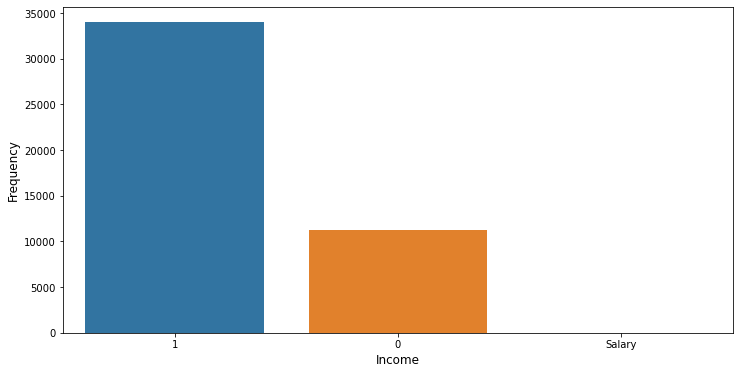

In [60]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);